# <div style="direction:rtl ;font-family: B Nazanin ;font-size:34px; line-height: 170%; text-align: center"> ذسته بندی تصاویر ماهواره ای  </div>

In [8]:
from fastai.conv_learner import *


<div style="direction:rtl ;font-family: B Nazanin ;font-size:34px; line-height: 170%; text-align: center"> مشخص کردن مسیر تصاویر ذخیره شده</div>

In [9]:
PATH ='/media/hamim/9ff9f0c5-df5c-47d7-94bb-b1b7451e18fd/datanakhaee/planet-competition/'

In [10]:
PATH_imgs = PATH + '/train-jpg/'
files = os.listdir(PATH_imgs)
files[0]

'train_35726.jpg'

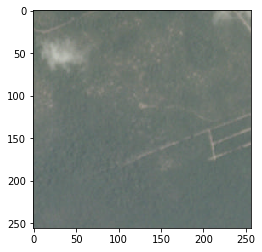

In [7]:
img = plt.imread(PATH_imgs + '/' + files[220])
plt.imshow(img)
plt.show()

<div style="direction:rtl ;font-family: B Nazanin ;font-size:34px; line-height: 170%; text-align: center">  معیار ارزیابی عملکرد مدل</div>

In [12]:

from sklearn.metrics import fbeta_score
import warnings

def f2(preds, targs, start=0.17, end=0.24, step=0.01):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return max([fbeta_score(targs, (preds>th), 2, average='samples')
for th in np.arange(start,end,step)])

<div style="direction:rtl ;font-family: B Nazanin ;font-size:26px; line-height: 170%; text-align: center">
در اینجا برچسب هر کدام تصاویر در یک فایل csv جداگانه ذخیره شده اند.
برای همین نمی توانیم از رویکرد کراس مانند که در آن هر زیرفولدر نام برچسب یک کلاس است برای خواندن و دسته بندی تصاویر با چندبرچسب استفاده کنیم و برای همین از متد from_csv برای خواندن استفاده می کنیم.</div>

In [13]:
label_csv = '/media/hamim/9ff9f0c5-df5c-47d7-94bb-b1b7451e18fd/datanakhaee/planet-competition' + '/train_v2.csv'

In [14]:
labels = pd.read_csv(label_csv)
labels.tail()

,image_name,tags
40474,train_40474,clear primary
40475,train_40475,cloudy
40476,train_40476,agriculture clear primary
40477,train_40477,agriculture clear primary road
40478,train_40478,agriculture cultivation partly_cloudy primary


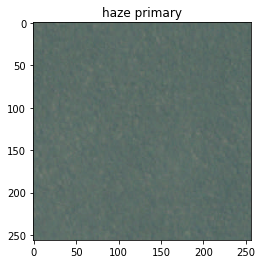

In [59]:
def plot_images(ind):
    img = plt.imread(PATH_imgs + '/' + 'train_' +str(ind)+".jpg")
    plt.imshow(img)
    plt.title(labels.loc[ind,"tags"])
    plt.show()
    
plot_images(0)

In [18]:
n = len(labels) ; n

40479

In [19]:
val_idxs = get_cv_idxs(n) ; val_idxs

array([34602, 11243, 14499, ..., 13041, 22865, 25088])

In [20]:
len(val_idxs)

8095

In [26]:
size = 64
arch = resnet34

<div style="direction:rtl ;font-family: B Nazanin ;font-size:26px; line-height: 170%; text-align: center">چون تصاویر ماهواره ای هستند منطقی است که تبدیل بر روی تصاویر به صورت transforms_top_down  باشد و به طور مثال یا به صورت عمودی flip شوند. </div>

In [27]:
PATH ='/media/hamim/9ff9f0c5-df5c-47d7-94bb-b1b7451e18fd/datanakhaee/planet-competition/'

In [28]:
def get_data(size):
    tfms = tfms_from_model(arch, size ,
                           aug_tfms=transforms_top_down,
                          max_zoom = 1.1)
    return ImageClassifierData.from_csv(PATH,'train-jpg',
                                       label_csv,tfms = tfms,
                                       suffix = '.jpg',
                                       val_idxs = val_idxs)

In [31]:
data = get_data(64)

In [23]:
val_idxs

array([34602, 11243, 14499, ..., 13041, 22865, 25088])

In [32]:
x,y = next(iter(data.trn_dl))
y


    0     0     0  ...      0     0     0
    1     0     0  ...      0     0     0
    1     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    1     0     0  ...      0     0     0
    0     0     0  ...      0     0     1
[torch.cuda.FloatTensor of size 64x17 (GPU 0)]

In [29]:
data = get_data(256)

In [61]:
list(zip(data.classes, y[0]))

[('agriculture', 0.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 1.0)]

In [33]:
size = 64
data = get_data(size)

In [34]:
x,y = next(iter(data.val_dl))
x.shape

torch.Size([64, 3, 64, 64])

In [35]:
metrics = [f2]

In [36]:
learn = ConvLearner.pretrained(arch,data,metrics = metrics)
learn.lr_find()

epoch      trn_loss   val_loss   f2                          
    0      0.226155   0.38739    0.822932  



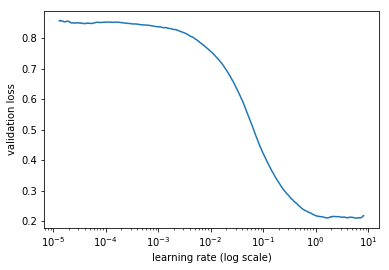

In [37]:
learn.sched.plot()

In [77]:
lr = 0.5
learn.fit(lr,3)

epoch      trn_loss   val_loss   f2                          
    0      0.143444   0.128139   0.88734   
    1      0.137027   0.123007   0.894698                    
    2      0.132469   0.120576   0.896277                    



[array([0.12058]), 0.8962772211040257]

In [79]:
learn.fit(lr,3,cycle_len=1)

epoch      trn_loss   val_loss   f2                          
    0      0.127777   0.118078   0.898827  
    1      0.125199   0.117018   0.900798                    
    2      0.125676   0.116337   0.900148                    



[array([0.11634]), 0.9001482921640618]

In [80]:
learn.fit(lr,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   f2                          
    0      0.125503   0.11629    0.899882  
    1      0.126689   0.116258   0.901534                    
    2      0.126274   0.115299   0.901683                    
    3      0.126638   0.116328   0.90037                     
    4      0.125422   0.115173   0.902075                    
    5      0.125118   0.114521   0.902617                    
    6      0.120598   0.114323   0.902355                    



[array([0.11432]), 0.9023550291739562]


 ![title](images/differential learning rate.PNG)


![title](images/conv.png)


In [39]:
lr = 0.1
lrs = [lr/9,lr/3,lr]


![title](images/differential_learning_rate.PNG)

In [40]:
learn.unfreeze()

In [41]:
learn.fit(lrs,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   f2                          
    0      0.127108   0.112562   0.906814  
    1      0.117186   0.104334   0.911236                    
    2      0.111561   0.100283   0.917482                    
    3      0.112393   0.10019    0.916705                    
    4      0.104484   0.097982   0.91779                     
    5      0.101963   0.095921   0.918053                    
    6      0.102908   0.095569   0.919183                     



[array([0.09557]), 0.9191833991714917]

In [86]:
size  = 256
learn.set_data(get_data(256))
learn.freeze()
learn.fit(lr,3,cycle_len = 1, cycle_mult = 2)

epoch      trn_loss   val_loss   f2                          
    0      0.112401   0.105057   0.908272  
    1      0.10943    0.101037   0.910833                    
    2      0.107577   0.098977   0.9132                      
    3      0.107773   0.098136   0.914849                    
    4      0.105683   0.096862   0.915167                    
    5      0.10161    0.09643    0.915081                    
    6      0.102034   0.0964     0.915556                     



[array([0.0964]), 0.915555512621935]

In [88]:


multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)
f2(preds,y)


0.9190388616511239

<div style="direction:rtl ;font-family: B Nazanin ;font-size:22px; line-height: 170%; text-align: center">
<ol> خلاصه گام ها
     <li> از متد lr_find() برای پیدا کردن بالاترین نرخ یادگیری که با استفاده از آن کماکان زیان بهبود و کاهش پیدا می کند استفاده کنیم.
     
     
</li>

<li> 
    آخرین لایه را به همراه داده افزایی برای 2 یا 3 ایپاک با تنظیم cycle_len=1 آموزش دهیم (یعنی precompute=False قرار داده شود.)
</li>

<li> 
همه لایه ها را آنفریز کنیم.

</li>
     <li> 
لایه های اولیه را با نرخ یادگیری 3 تا 10 برابر کوچکتر از لایه های میانی آموزش دهیم.
</li>

<li> 
 یک مدل بسازیم و به آن داده ها را بدهیم

</li>

<li> 
شبکه کامل را تا بیش برازش با تنظیم cycle_mult=2 آموزش دهیم.
</li>

</ol>
</div>

